In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
df = pd.read_csv("KaggleV2-May-2016.csv")

# Quick check
print("# First 5 rows:\n", df.head(), "\n")
print("# Info:\n")
print(df.info())


# First 5 rows:
       PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0          

In [3]:
#Rename column and check

In [4]:
df.rename(columns={'No-show': 'No_show'}, inplace=True)
print("# Columns after renaming:\n", df.columns, "\n")


# Columns after renaming:
 Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No_show'],
      dtype='object') 



In [5]:
#Convert date columns and create new features

In [6]:
# Convert to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# Create date-related features
df['WaitingDays'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days
df['ScheduledDay_Weekday'] = df['ScheduledDay'].dt.weekday
df['AppointmentDay_Weekday'] = df['AppointmentDay'].dt.weekday
df['AppointmentWeekDay'] = df['AppointmentDay'].dt.day_name()

# Show results
print(df[['ScheduledDay', 'AppointmentDay', 'WaitingDays', 'AppointmentWeekDay']].head())


               ScheduledDay            AppointmentDay  WaitingDays  \
0 2016-04-29 18:38:08+00:00 2016-04-29 00:00:00+00:00           -1   
1 2016-04-29 16:08:27+00:00 2016-04-29 00:00:00+00:00           -1   
2 2016-04-29 16:19:04+00:00 2016-04-29 00:00:00+00:00           -1   
3 2016-04-29 17:29:31+00:00 2016-04-29 00:00:00+00:00           -1   
4 2016-04-29 16:07:23+00:00 2016-04-29 00:00:00+00:00           -1   

  AppointmentWeekDay  
0             Friday  
1             Friday  
2             Friday  
3             Friday  
4             Friday  


In [7]:
# Map target, drop unnecessary columns

In [8]:
# Binary encode target
df['No_show'] = df['No_show'].map({'No': 0, 'Yes': 1})
print("# Target value counts:\n", df['No_show'].value_counts(), "\n")

# Drop unneeded columns
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis=1, inplace=True)

# Check missing values
print("# Missing values:\n", df.isnull().sum())


# Target value counts:
 No_show
0    88208
1    22319
Name: count, dtype: int64 

# Missing values:
 Gender                    0
Age                       0
Neighbourhood             0
Scholarship               0
Hipertension              0
Diabetes                  0
Alcoholism                0
Handcap                   0
SMS_received              0
No_show                   0
WaitingDays               0
ScheduledDay_Weekday      0
AppointmentDay_Weekday    0
AppointmentWeekDay        0
dtype: int64


In [9]:
# Encode categorical features

In [10]:
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

print("# Encoded columns:\n", df[categorical_cols].head())


# Encoded columns:
    Gender  Neighbourhood  AppointmentWeekDay
0       0             39                   0
1       1             39                   0
2       0             45                   0
3       0             54                   0
4       0             39                   0


In [11]:
# Count of no-shows vs shows

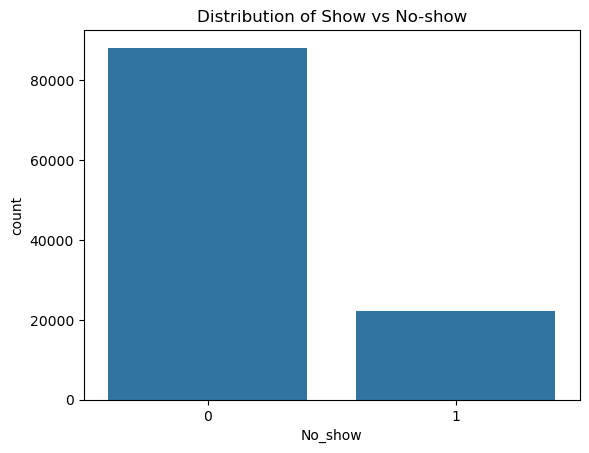

In [12]:
sns.countplot(x='No_show', data=df)
plt.title("Distribution of Show vs No-show")
plt.show()

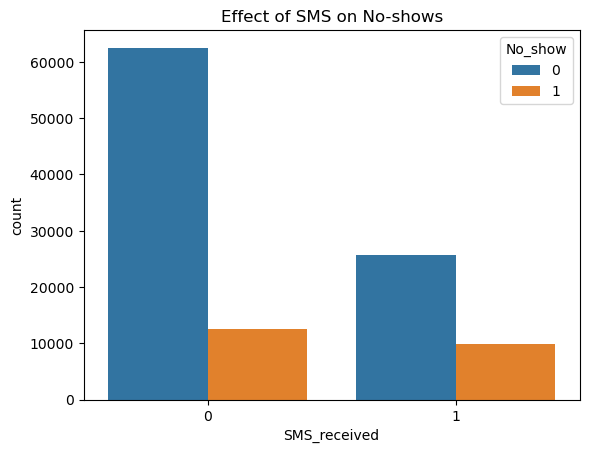

In [13]:
sns.countplot(x='SMS_received', hue='No_show', data=df)
plt.title("Effect of SMS on No-shows")
plt.show()

In [14]:
# Waiting days vs Attendence

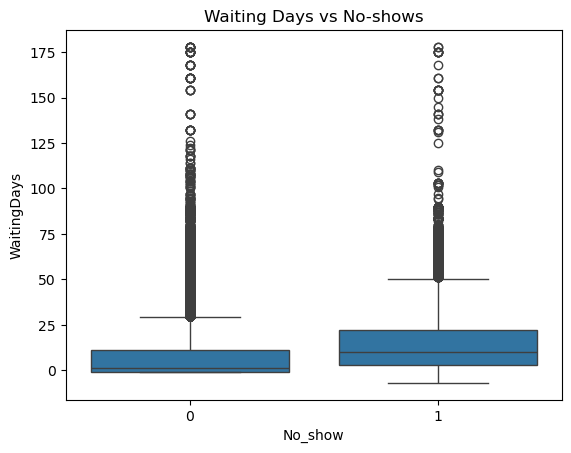

In [15]:
sns.boxplot(x='No_show', y='WaitingDays', data=df)
plt.title("Waiting Days vs No-shows")
plt.show()

In [16]:
# Age Distribution 

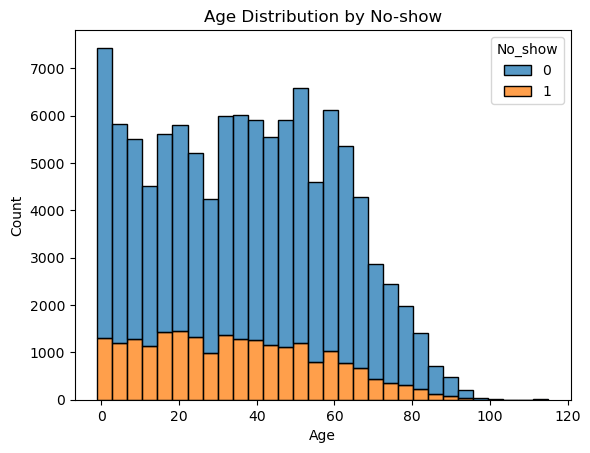

In [17]:
sns.histplot(data=df, x='Age', hue='No_show', multiple="stack", bins=30)
plt.title("Age Distribution by No-show")
plt.show()

In [18]:
#Split the data

In [19]:
X = df.drop('No_show', axis=1)
y = df['No_show']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (88421, 13)
Test shape: (22106, 13)


In [20]:
#Feature scaling

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [22]:
#Logistic Regression

In [23]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))


Logistic Regression Accuracy: 0.7958020446937483

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.99      0.89     17642
           1       0.37      0.02      0.03      4464

    accuracy                           0.80     22106
   macro avg       0.58      0.50      0.46     22106
weighted avg       0.71      0.80      0.71     22106


Confusion Matrix:
 [[17523   119]
 [ 4395    69]]


In [24]:
# Decision Tree

In [25]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy: 0.7256400977110287


In [26]:
#Random Forest

In [27]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.7742694291142677


In [31]:
#Feature Importance

In [32]:
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
print("Top 10 Feature Importances:")
print(feature_importances.sort_values(ascending=False).head(10))


Top 10 Feature Importances:
Age                       0.328086
Neighbourhood             0.301339
WaitingDays               0.198304
ScheduledDay_Weekday      0.053108
Gender                    0.024964
AppointmentDay_Weekday    0.019106
AppointmentWeekDay        0.018808
SMS_received              0.016075
Scholarship               0.009766
Hipertension              0.009311
dtype: float64


In [33]:
results = pd.DataFrame({
    "Actual_NoShow": y_test,
    "Predicted_NoShow": y_pred_rf
})

results.to_csv("no_show_predictions.csv", index=False)
print("✅ Results saved to no_show_predictions.csv")


✅ Results saved to no_show_predictions.csv


In [35]:
import os

# Get path to Documents folder
documents_path = os.path.join(os.path.expanduser("~"), "Documents")

# Define the full file path to save in Documents
file_path = os.path.join(documents_path, "no_show_predictions.csv")

# Save the CSV to Documents
results.to_csv(file_path, index=False)

print(f"✅ File saved to: {file_path}")


✅ File saved to: C:\Users\DELL\Documents\no_show_predictions.csv
